In [70]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True) # this loads something called a Bunch
list(iris) # this lets us see what data elements are in the Bunch

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Model with no regularization 

In [12]:
# Get independent and dependent variables
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [154]:
log_reg = LogisticRegression(random_state = 42, penalty= None)
log_reg.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=42)

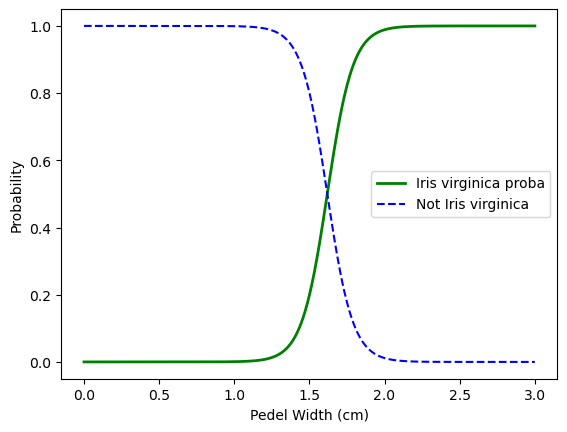

In [219]:
X_new = np.linspace(0,3,1000).reshape(-1,1) #reshape to get column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundry = X_new[y_proba[:, 1] >= 0.5][0,0]

#plt.plot(X_new, y_proba[:, ], "b--", linewidth=2, label= "Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label= "Iris virginica proba")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

plt.xlabel("Pedel Width (cm)")
plt.ylabel("Probability")
plt.legend()

**Assessment**
Assessing this model, we want to look at the sensativity. As Iris virginica is poisionus, the priority should be a model that identifies as many of the True's as possible, even at the cost of a higher rate of false positives. 

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

In [201]:
from sklearn.metrics import confusion_matrix


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')


y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print(f"Accuracy: {accuracy}")

Cross-Validation Results (Accuracy): [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9600000000000002
Confusion Matrix:
[[26  0]
 [ 0 12]]
Accuracy: 1.0


**Model with Regularization**

In [171]:
log_reg_l2 = LogisticRegression(random_state = 42, penalty= 'l2')
log_reg_l2.fit(X_train, y_train)

LogisticRegression(random_state=42)

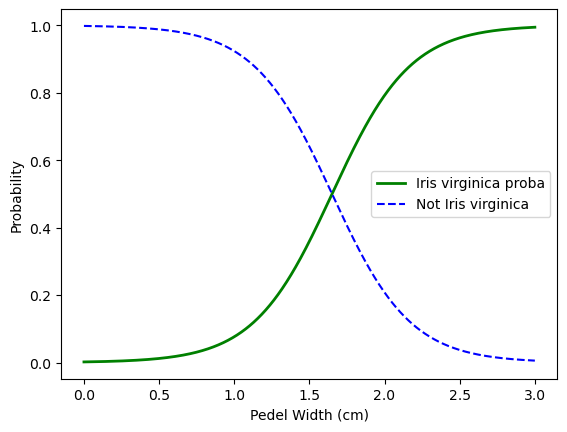

In [221]:
X_new = np.linspace(0,3,1000).reshape(-1,1) #reshape to get column vector
y_proba = log_reg_l2.predict_proba(X_new)
decision_boundry = X_new[y_proba[:, 1] >= 0.5][0,0]

#plt.plot(X_new, y_proba[:, ], "b--", linewidth=2, label= "Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label= "Iris virginica proba")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

plt.xlabel("Pedel Width (cm)")
plt.ylabel("Probability")
plt.legend()

In [203]:
#cross validate
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(log_reg_l2, X, y, cv=kf, scoring='accuracy')

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

# Compute the confusion matrix

y_pred_l2 = log_reg_l2.predict(X_test)

# Compute the confusion matrix
cm_l2 = confusion_matrix(y_test, y_pred_l2)
print("Confusion Matrix:")
print(cm)

print(f"Accuracy: {accuracy}")

Cross-Validation Results (Accuracy): [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Accuracy: 0.9600000000000002
Confusion Matrix:
[[26  0]
 [ 0 12]]
Accuracy: 1.0
